In [1]:
import stltovoxel
import numpy as np
from stl import mesh
import matplotlib.pyplot as plt

In [2]:
def convert_mesh(mesh, resolution=100, voxel_size=None, parallel=True):
    return convert_meshes([mesh], resolution, voxel_size, parallel)


def convert_meshes(meshes, resolution=100, voxel_size=None, parallel=True):
    scale, shift, shape = stltovoxel.slice.calculate_scale_shift(meshes, resolution, voxel_size)
    vol = np.zeros(shape[::-1], dtype=np.int8)

    for mesh_ind, org_mesh in enumerate(meshes):
        stltovoxel.slice.scale_and_shift_mesh(org_mesh, scale, shift)
        cur_vol = stltovoxel.slice.mesh_to_plane(org_mesh, shape, parallel)
        vol[cur_vol] = mesh_ind + 1
    return vol, scale, shift


def convert_file(input_file_path, output_file_path, resolution=100, voxel_size=None, pad=1, parallel=False):
    return convert_files([input_file_path], output_file_path, resolution=resolution,
                  voxel_size=voxel_size, pad=pad, parallel=parallel)


def convert_files(input_file_paths, output_file_path, colors=[(255, 255, 255)],
                  resolution=100, voxel_size=None, pad=1, parallel=False):
    meshes = []
    for input_file_path in input_file_paths:
        mesh_obj = mesh.Mesh.from_file(input_file_path)
        org_mesh = np.hstack((mesh_obj.v0[:, np.newaxis], mesh_obj.v1[:, np.newaxis], mesh_obj.v2[:, np.newaxis]))
        meshes.append(org_mesh)

    vol, scale, shift = convert_meshes(meshes, resolution, voxel_size, parallel)
    return vol


In [12]:
vol = convert_file('shape1_4buildings.stl','output',resolution=300,pad=0)

exception (False, 'No lines found, impossible to read')
Processing layer 0/301
Processing layer 1/301
Processing layer 2/301
Processing layer 3/301
Processing layer 4/301
Processing layer 5/301
Processing layer 6/301
Processing layer 7/301
Processing layer 8/301
Processing layer 9/301
Processing layer 10/301
Processing layer 11/301
Processing layer 12/301
Processing layer 13/301
Processing layer 14/301
Processing layer 15/301
Processing layer 16/301
Processing layer 17/301
Processing layer 18/301
Processing layer 19/301
Processing layer 20/301
Processing layer 21/301
Processing layer 22/301
Processing layer 23/301
Processing layer 24/301
Processing layer 25/301
Processing layer 26/301
Processing layer 27/301
Processing layer 28/301
Processing layer 29/301
Processing layer 30/301
Processing layer 31/301
Processing layer 32/301
Processing layer 33/301
Processing layer 34/301
Processing layer 35/301
Processing layer 36/301
Processing layer 37/301
Processing layer 38/301
Processing layer 3

In [4]:
vol.shape #vol[z][y][x]

(301, 301, 301)

In [13]:
vol_2d=np.sum(vol,axis=1)
print(vol_2d.shape)
vol_2d=vol_2d[:-1,:-1]
print(vol_2d.shape)

(301, 301)
(300, 300)


In [10]:
print(vol_2d[150][89])


300


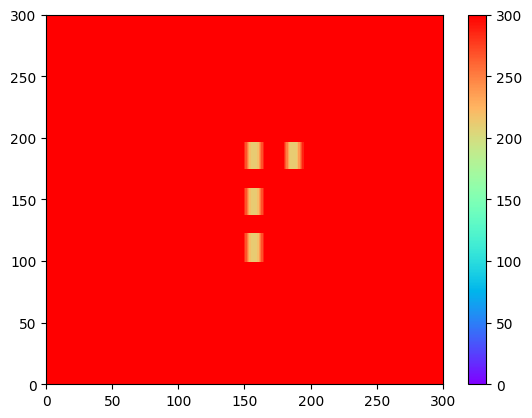

In [14]:
plt.pcolor(vol_2d,cmap='rainbow')
plt.colorbar()
plt.show()